# Weather Analysis


----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


In [1]:
# Dependencies and Setup
%matplotlib notebook

import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import os
import csv

# Import API key
from wapik_blooms import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [3]:
#print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
# Setup URL and Query URL

url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = url + "appid=" + api_key + "&q="


# Set up counters and lists
# this step came later after I ran a few test responses to see the format of the data

record_counter = 0
set_counter = 1

city_name = []
cod = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Account for skips - added this towards the end
skip_counter = 0
skip_list = []

print(query_url)

print("Beginning Data Retrieval")
print('-'*30)

# set up loop
for city in cities:

    response_data = requests.get(query_url + city).json()

    try:
        city_name.append(response_data['name'])
        cod.append(response_data['cod'])
        cloudiness.append(response_data['clouds']['all'])
        country.append(response_data['sys']['country'])
        date.append(response_data['dt'])
        humidity.append(response_data['main']['humidity'])
        lat.append(response_data['coord']['lat'])
        lng.append(response_data['coord']['lon'])
        max_temp.append(response_data['main']['temp_max'])
        wind_speed.append(response_data['wind']['speed'])
        print("Processing Record " + str(record_counter) + " of Set " + str(set_counter) + " | " + str.title(city))

    except (KeyError, NameError, TypeError, AttributeError):      
        print("Processing Record " + str(record_counter) + " of Set " + str(set_counter) + " | " + str.title(city))
        print(f"The requested city of: {str.title(city)} was not found. Skipping...")
        #cod.append(response.status_code) - will remove this because was causing issues.
        skip_counter += 1
        skip_list.append(city)
            

    record_counter += 1
    if record_counter == 51:
        set_counter += 1
        record_counter = 1
    
print('-'*30)
print('Data Retrieval Complete')
print('-'*30)

http://api.openweathermap.org/data/2.5/weather?appid=6e01409e508e9c452a34604334dd7a3c&q=
Beginning Data Retrieval
------------------------------
Processing Record 0 of Set 1 | Balimo
The requested city of: Balimo was not found. Skipping...
Processing Record 1 of Set 1 | Guerrero Negro
Processing Record 2 of Set 1 | Albany
Processing Record 3 of Set 1 | Vaini
Processing Record 4 of Set 1 | Kununurra
Processing Record 5 of Set 1 | Castro
Processing Record 6 of Set 1 | Ondorhaan
The requested city of: Ondorhaan was not found. Skipping...
Processing Record 7 of Set 1 | Ushuaia
Processing Record 8 of Set 1 | Qaanaaq
Processing Record 9 of Set 1 | Harlingen
Processing Record 10 of Set 1 | Bengkulu
The requested city of: Bengkulu was not found. Skipping...
Processing Record 11 of Set 1 | Nikolskoye
Processing Record 12 of Set 1 | Musoma
Processing Record 13 of Set 1 | Srednekolymsk
Processing Record 14 of Set 1 | Hobart
Processing Record 15 of Set 1 | Khandyga
Processing Record 16 of Set 1 | 

Processing Record 13 of Set 4 | Liuhe
Processing Record 14 of Set 4 | Umzimvubu
The requested city of: Umzimvubu was not found. Skipping...
Processing Record 15 of Set 4 | Lengshuijiang
Processing Record 16 of Set 4 | Aklavik
Processing Record 17 of Set 4 | Lagoa
Processing Record 18 of Set 4 | Provideniya
Processing Record 19 of Set 4 | Chubbuck
Processing Record 20 of Set 4 | Glyadyanskoye
Processing Record 21 of Set 4 | Novaya Zaimka
Processing Record 22 of Set 4 | Sri Aman
Processing Record 23 of Set 4 | San Patricio
Processing Record 24 of Set 4 | Chokurdakh
Processing Record 25 of Set 4 | Arlit
Processing Record 26 of Set 4 | Nsanje
Processing Record 27 of Set 4 | Cabo San Lucas
Processing Record 28 of Set 4 | Porto Walter
Processing Record 29 of Set 4 | Ilulissat
Processing Record 30 of Set 4 | Tilichiki
Processing Record 31 of Set 4 | Tsihombe
The requested city of: Tsihombe was not found. Skipping...
Processing Record 32 of Set 4 | Deputatskiy
Processing Record 33 of Set 4 | K

Processing Record 36 of Set 7 | Fort Saint John
The requested city of: Fort Saint John was not found. Skipping...
Processing Record 37 of Set 7 | Kaduqli
Processing Record 38 of Set 7 | Katsuura
Processing Record 39 of Set 7 | Yabelo
Processing Record 40 of Set 7 | Meulaboh
Processing Record 41 of Set 7 | Upernavik
Processing Record 42 of Set 7 | Nabire
Processing Record 43 of Set 7 | Latehar
Processing Record 44 of Set 7 | Hamilton
Processing Record 45 of Set 7 | Tumannyy
The requested city of: Tumannyy was not found. Skipping...
Processing Record 46 of Set 7 | Hasaki
Processing Record 47 of Set 7 | Touros
Processing Record 48 of Set 7 | Suruc
Processing Record 49 of Set 7 | Seoul
Processing Record 50 of Set 7 | Laguna
Processing Record 1 of Set 8 | Mantua
Processing Record 2 of Set 8 | Kloulklubed
Processing Record 3 of Set 8 | Riaba
The requested city of: Riaba was not found. Skipping...
Processing Record 4 of Set 8 | Kuusamo
Processing Record 5 of Set 8 | Salalah
Processing Record 

Processing Record 12 of Set 11 | Serenje
Processing Record 13 of Set 11 | Ruteng
Processing Record 14 of Set 11 | Taoudenni
Processing Record 15 of Set 11 | Sajalices
Processing Record 16 of Set 11 | Loreto
Processing Record 17 of Set 11 | Sundsvall
Processing Record 18 of Set 11 | Mitu
Processing Record 19 of Set 11 | Novosokolniki
Processing Record 20 of Set 11 | Fort Dodge
Processing Record 21 of Set 11 | Port-Gentil
Processing Record 22 of Set 11 | Martil
Processing Record 23 of Set 11 | Bokspits
The requested city of: Bokspits was not found. Skipping...
Processing Record 24 of Set 11 | Minot
Processing Record 25 of Set 11 | San Fernando
Processing Record 26 of Set 11 | Hami
Processing Record 27 of Set 11 | Jozefow
Processing Record 28 of Set 11 | Tautira
Processing Record 29 of Set 11 | Kualakapuas
Processing Record 30 of Set 11 | Half Moon Bay
Processing Record 31 of Set 11 | Sulangan
Processing Record 32 of Set 11 | We
The requested city of: We was not found. Skipping...
Process

In [5]:
# accounting for skips!

print(skip_counter)
# print(skip_list)

63


In [6]:
#print(city_name)
print()
print(len(city_name))


533


In [7]:
# Status code errors - this is to see which cities and their
# respective status codes resulted in an error from the API call

# print(cod)
# print()
print(len(cod))

533


In [8]:
#checks
#print(cloudiness)


In [9]:
# checks
#print(country)


In [10]:
#checks
# print(date)
# print(len(date))

In [11]:
# checks
#print(humidity)

In [12]:
# checks
#print(lat)

In [13]:
# # checks
# print(lng)


In [14]:
# checks
#print(max_temp)


In [15]:
# checks
#print(wind_speed)

In [16]:
# VALUES ZIP BELOW WAS USED SUCCESSFULLY FOR CONVERTING THE LISTS TO A ZIP TO A CSV FILE (LOOKED IN PYTHON DAY 2 @ UDEMY ACTIVITY)
values_zip = zip(city_name, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed)

In [17]:
# CONVERT TO CSV FILE

with open('city_data_JG2.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp (Kelvin)', 'Wind Speed'])
    writer.writerows(values_zip)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
citydata_csvto_pd = pd.read_csv('city_data_JG2.csv')
print(citydata_csvto_pd.head())

             City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0  Guerrero Negro          76      MX  1553729931        61  27.97 -114.04   
1          Albany          20      US  1553729763        16  42.65  -73.75   
2           Vaini           0      IN  1553729932        90  15.34   74.49   
3       Kununurra           0      AU  1553727600        74 -15.77  128.74   
4          Castro           0      CL  1553727600        76 -42.48  -73.76   

   Max Temp (Kelvin)  Wind Speed  
0            291.772        5.96  
1            281.150        4.60  
2            292.372        0.61  
3            300.150        1.00  
4            286.150        2.60  


In [19]:
df_city_data = pd.DataFrame(citydata_csvto_pd)
df_city_data.count()

# This was short one country based on my search. This could be because of the city not
# being a part of a recognized country (e.g. Burma). The plots below only asked for cities to be plotted.
# So I went a head and plotted everything on the charts down below.

City                 533
Cloudiness           533
Country              532
Date                 533
Humidity             533
Lat                  533
Lng                  533
Max Temp (Kelvin)    533
Wind Speed           533
dtype: int64

In [20]:
df_city_data.head()

# this was ran a few times. I added the Max Temp Column (Fahrenheit) in the next section

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (Kelvin),Wind Speed
0,Guerrero Negro,76,MX,1553729931,61,27.97,-114.04,291.772,5.96
1,Albany,20,US,1553729763,16,42.65,-73.75,281.150,4.60
2,Vaini,0,IN,1553729932,90,15.34,74.49,292.372,0.61
3,Kununurra,0,AU,1553727600,74,-15.77,128.74,300.150,1.00
4,Castro,0,CL,1553727600,76,-42.48,-73.76,286.150,2.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


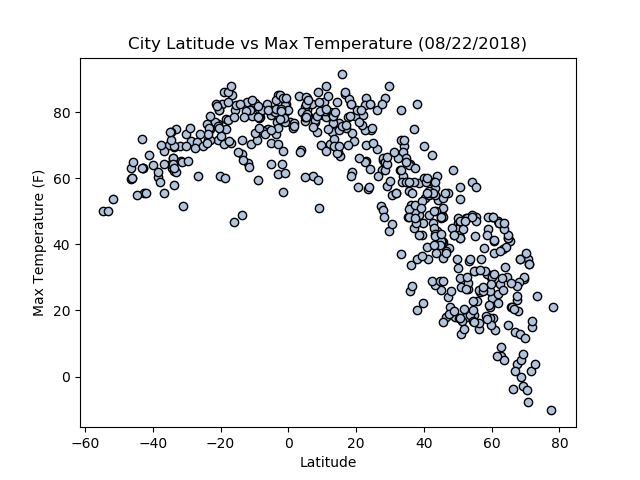

In [21]:
# Convert Temperature from Kelvins to Fahrenheit and set it up as a variable
max_temp_slice_F = (df_city_data.loc[:, ['Max Temp (Kelvin)']] - 273.15) * (9/5) + 32

# Add new column into dataframe
df_city_data['Max Temp (Fahrenheit)'] = max_temp_slice_F

# set up the latitude variable
lat = df_city_data.loc[:, ['Lat']]

plt.figure(1)
plt.scatter(lat, max_temp_slice_F, marker='o', edgecolor='black', facecolors='lightsteelblue')

plt.title("City Latitude vs Max Temperature (08/22/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
plt.savefig('./citylatitude_vs_maxtemp.png')

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


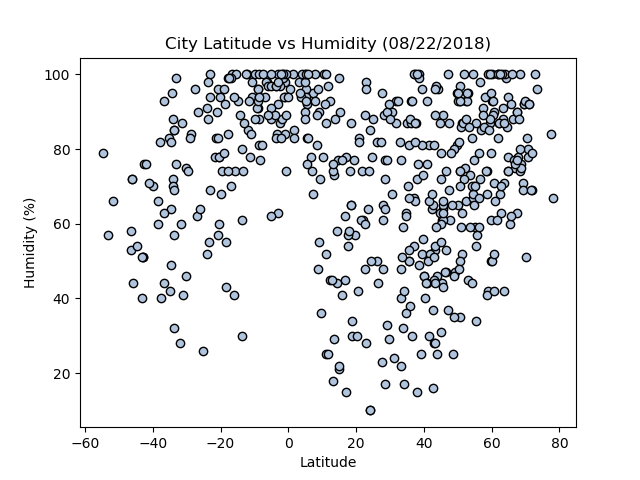

In [22]:
humidity_percent = df_city_data.loc[:, ['Humidity']]

plt.figure(2)
plt.scatter(lat, humidity_percent, marker='o', edgecolor='black', facecolors='lightsteelblue')

plt.title("City Latitude vs Humidity (08/22/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

plt.savefig('./citylatitude_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


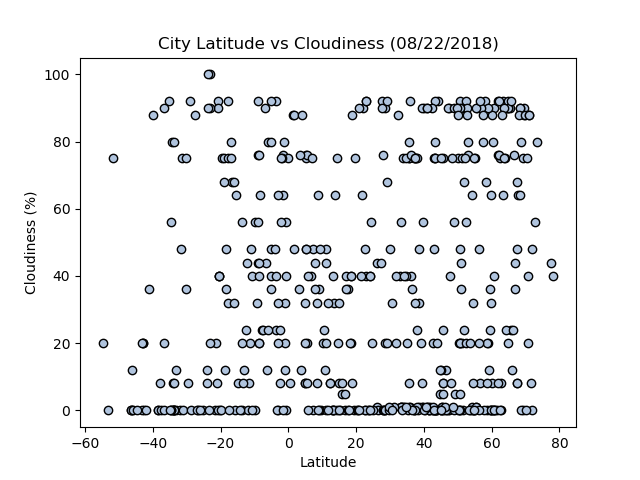

In [23]:
cloudiness_data = df_city_data.loc[:, ['Cloudiness']]

plt.figure(3)
plt.scatter(lat, cloudiness_data, marker='o', edgecolor='black', facecolors='lightsteelblue')

plt.title("City Latitude vs Cloudiness (08/22/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

plt.savefig('./citylatitude_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


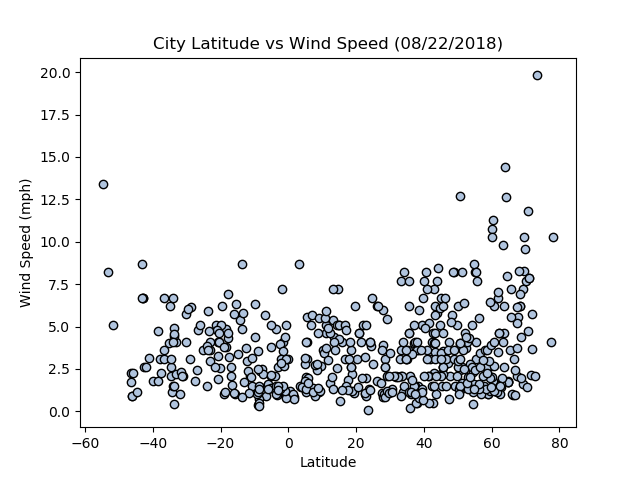

In [24]:
windspeed_data = df_city_data.loc[:, ['Wind Speed']]

plt.figure(4)
plt.scatter(lat, windspeed_data, marker='o', edgecolor='black', facecolors='lightsteelblue')

plt.title("City Latitude vs Wind Speed (08/22/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

plt.savefig('./citylatitude_vs_windspeed.png')

# DATA ANALYSIS

### Note: most of the random sample appears to have populated more cities with latitudes between the 0 to 80 than -60 to 0.

####  The data suggests:

*	City Latitudes vs Temperatures (F) Chart:  Cities with latitudes of negative sixty to twenty had the highest temperatures. This makes sense because a latitude of zero is near Africa, which is known to be very hot and near the equator. As the city latitudes moved away from zero, the city temperatures were found to be cooler.
*	City Latitudes vs Humidity chart observations: overall humidity levels varied across city latitudes. Between latitudes of negative thirty five and approximately eight, there is a concentration of cities with one hundred percent humidity levels, particularly around zero degree. There’s a pocket between city latitudes eight to thirty five where there were no cities with one hundred percent humidity level.
*	As for the City Latitude vs Cloudiness Chart: cloudiness varied across all city latitudes.
*	Lastly, in the City Latitude vs Wind Speed Chart, the data suggests that city latitudes slightly impacted windspeed. There are a  higher concentration of cities with latitudes between zero to eight that experience high wind speeds, but this could also be due to the sample being compromised of more cities with zero to eighty degrees. The distribution of plots appear to be comparable on both positive and negative sides with the exception of a few outliers.

